<a href="https://colab.research.google.com/github/jiminmini/mini/blob/main/5_9_%ED%95%84%EC%82%AC%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**[개념 정리]**

#**규제 선형 모델**



1.   릿지: 사이킷런은 Ridge 클래스로 구현


2.   라쏘: W의 절댓값에 페널티를 부여하는 L1 규제를 선형 회귀에 적용한 것


3.   엘라스틱넷:  L2 규제와 L1 규제를 결합한 회귀



---
#**선형 회귀 모델을 위한 데이터 변환**

- 선형 회귀 모델과 같은 선형 모델은 일반적으로 피처와 타깃값 간에 선형의 관계 가정

- 중요 피처들이나 타깃값의 분포도가 심하게 왜곡됐을 경우 변환작업 수행


---

#**로지스틱 회귀**

-분류에 사용

-LogisticRegression


---




#**회귀 트리**
-알고리즘: Decision Tree

-회귀 Estimator 클래스: DecisionTreeRegressor

-분류 Estimator 클래스: DecisionTreeClassifier




#**[코드 필사]**

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
from sklearn.datasets import fetch_california_housing
import warnings

# 경고 무시 설정
warnings.filterwarnings('ignore')

# 주피터 노트북용 그래프 표시 설정 (터미널에서는 필요 없음)
# %matplotlib inline  # 주석 처리하거나 제거: .py 파일에서 실행 시 에러 발생

# California Housing 데이터 로드
boston = fetch_california_housing()
bostonDF = pd.DataFrame(boston.data, columns=boston.feature_names)

# 타겟 (주택 가격)을 PRICE 컬럼으로 추가
bostonDF['PRICE'] = boston.target

# 데이터 크기 출력
print(bostonDF.shape)

# 상위 5개 행 출력
bostonDF.head()


(20640, 9)


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,PRICE
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)
X_train, X_test, y_train, y_test = train_test_split(X_data, y_target, test_size=0.3, random_state=156)
 # 선형 회귀 OLS로 학습/예측/평가 수행.
lr = LinearRegression()
lr.fit(X_train, y_train )

LinearRegression()

In [6]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
 # alpha=10으로 설정해 릿지 회귀 수행.
ridge = Ridge(alpha = 10)
neg_mse_scores = cross_val_score(ridge, X_data, y_target,scoring="neg_mean_squared_error", cv = 5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)
print(' 5 folds 의 개별 Negative MSE scores：',
np.round(neg_mse_scores, 3))
print(' 5 folds 의 개별 RMSE scores : ', np.round(rmse_scores, 3))
print(' 5 folds 의 평균 RMSE : {0:.3f} '.format(avg_rmse))

 5 folds 의 개별 Negative MSE scores： [-0.484 -0.623 -0.646 -0.544 -0.494]
 5 folds 의 개별 RMSE scores :  [0.695 0.789 0.804 0.737 0.703]
 5 folds 의 평균 RMSE : 0.746 


In [7]:
 # 릿지에 사용될 alpha 파라미터의 값을 정의
alphas = [0, 0.1, 1, 10, 100]
 # alphas list 값을 반복하면서 alpha에 따른 평균 rmse를 구함.
for alpha in alphas :
    ridge = Ridge(alpha = alpha)

 # cross_val_score를 이용해 5 폴드의 평균 RMSE를 계산
neg_mse_scores = cross_val_score(ridge, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
print('alpha {0} 일 때 5 folds 의 평균 RMSE : {1:.3f}'.format(alpha, avg_rmse))

alpha 100 일 때 5 folds 의 평균 RMSE : 0.746


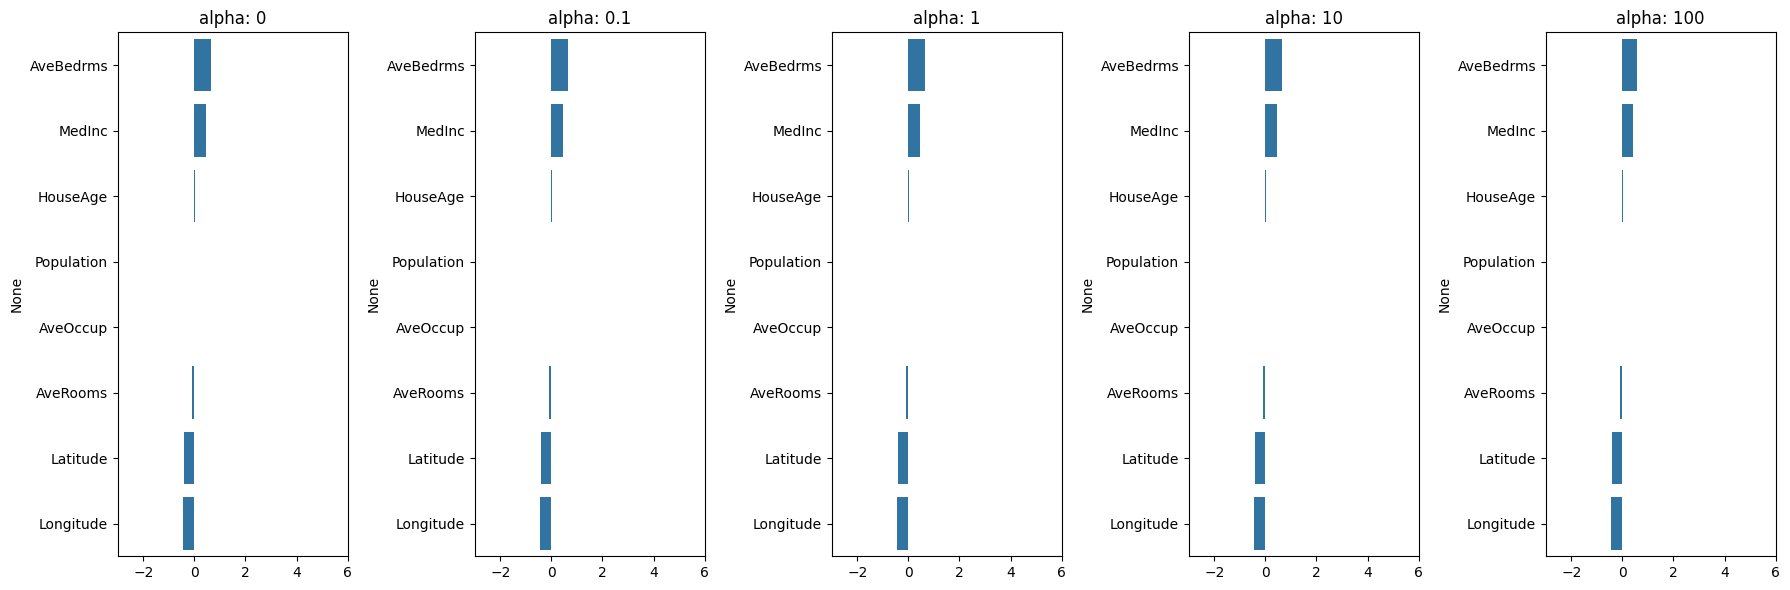

            alpha: 0  alpha: 0.1  alpha: 1  alpha: 10  alpha: 100
MedInc      0.436693    0.436683  0.436594   0.435719    0.428210
HouseAge    0.009436    0.009436  0.009437   0.009452    0.009592
AveRooms   -0.107322   -0.107303 -0.107133  -0.105456   -0.091012
AveBedrms   0.645066    0.644965  0.644062   0.635174    0.558249
Population -0.000004   -0.000004 -0.000004  -0.000004   -0.000003


In [8]:


# 3. 시각화를 위한 설정
fig, axs = plt.subplots(figsize=(18, 6), nrows=1, ncols=5)
coeff_df = pd.DataFrame()

# 4. 각 alpha에 대한 Ridge 회귀 학습 및 시각화
for pos, alpha in enumerate(alphas):
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_data, y_target)

    # 회귀 계수 Series 생성 및 저장
    coeff = pd.Series(data=ridge.coef_, index=X_data.columns)
    colname = 'alpha: ' + str(alpha)
    coeff_df[colname] = coeff

    # 시각화 (내림차순 정렬)
    coeff_sorted = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3, 6)
    sns.barplot(x=coeff_sorted.values, y=coeff_sorted.index, ax=axs[pos])

# 5. 전체 plot 출력
plt.tight_layout()
plt.show()

# 6. 회귀 계수 DataFrame 출력
print(coeff_df.head())


In [9]:
print(coeff_df.columns.tolist())

['alpha: 0', 'alpha: 0.1', 'alpha: 1', 'alpha: 10', 'alpha: 100']


In [11]:
ridge_alphas = [0, 0.1, 1, 10, 100]
sort_column = 'alpha: ' + str(ridge_alphas[0])
if sort_column in coeff_df.columns:
    coeff_df = coeff_df.sort_values(by=sort_column, ascending=False)
    # 또는: coeff_df.sort_values(by=sort_column, ascending=False, inplace=True)
else:
    print(f"열 '{sort_column}'이 coeff_df에 존재하지 않습니다.")

In [12]:
from sklearn.linear_model import Lasso, ElasticNet
 # alpha값에 따른 회귀 모델의 폴드 평균 RMSE를 출력하고 회귀 계수값들을 DataFrame으로 반환
def get_linear_reg_eval(model_name, params=None, X_data_n=None,
                        y_target_n=None, verbose=True, return_coeff=True):
    coeff_df = pd.DataFrame()
    if verbose : print('#######',model_name,'#######')
    for param in params:
        if model_name =='Ridge': model = Ridge(alpha=param)
        elif model_name =='Lasso': model = Lasso(alpha=param)
        elif model_name =='ElasticNet': model = ElasticNet(alpha=param, l1_ratio=0.7)
        neg_mse_scores = cross_val_score(model, X_data_n,
                                         y_target_n,scoring="neg_mean_squared_error", cv = 5)
        avg_rmse = np.mean(np.sqrt(-1 * neg_mse_scores))
        print('alpha {0}일 때 5 폴드 세트의 평균 RMSE： {1:.3f}'.format(param, avg_rmse))
# cross_val_score는 evaluation metric만 반환하므로 모델을 다시 학습하여 회귀 계수 추출
        model.fit(X_data_n , y_target_n)
        if return_coeff:
# alpha에 따른 피처별 회귀 계수를 Series로 변환하고 이를 DataFrame의 칼럼으로 추가.
            coeff = pd.Series(data=model.coef_ , index=X_data_n.columns )
            colname='alpha：'+str(param)
            coeff_df[colname] = coeff
    return coeff_df
 # end of get_linear_regre_eval

# 라쏘에 사용될 alpha 파라미터의 값을 정의하고 get_linear_reg_eval() 함수 호출
lasso_alphas = [ 0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df =get_linear_reg_eval('Lasso', params=lasso_alphas,
                                    X_data_n=X_data, y_target_n=y_target)

####### Lasso #######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE： 0.784
alpha 0.1일 때 5 폴드 세트의 평균 RMSE： 0.813
alpha 0.5일 때 5 폴드 세트의 평균 RMSE： 0.873
alpha 1일 때 5 폴드 세트의 평균 RMSE： 1.000
alpha 3일 때 5 폴드 세트의 평균 RMSE： 1.171


In [13]:
# 반환된 coeff_lasso_df를 첫 번째 칼럼순으로 내림차순 정렬해 회귀계수 DataFrame 출력
sort_column = 'alpha：'+str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)

,alpha：0.07,alpha：0.1,alpha：0.5,alpha：1,alpha：3
MedInc,0.387057,0.390583,0.288855,0.145469,0.000000
HouseAge,0.013391,0.015082,0.012031,0.005815,0.000000
Population,0.000010,0.000018,0.000012,-0.000006,-0.000023
AveRooms,-0.000000,-0.000000,0.000000,0.000000,0.000000
AveBedrms,0.000000,0.000000,-0.000000,-0.000000,-0.000000
AveOccup,-0.003409,-0.003323,-0.000000,-0.000000,-0.000000
Longitude,-0.204689,-0.099225,-0.000000,-0.000000,-0.000000
Latitude,-0.212806,-0.114214,-0.000000,-0.000000,-0.000000


In [14]:
elastic_alphas = [ 0.07, 0.1, 0.5, 1, 3]
coeff_elastic_df =get_linear_reg_eval('ElasticNet', params=elastic_alphas,
                                      X_data_n=X_data, y_target_n=y_target)

####### ElasticNet #######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE： 0.773
alpha 0.1일 때 5 폴드 세트의 평균 RMSE： 0.788
alpha 0.5일 때 5 폴드 세트의 평균 RMSE： 0.855
alpha 1일 때 5 폴드 세트의 평균 RMSE： 0.931
alpha 3일 때 5 폴드 세트의 평균 RMSE： 1.171


In [15]:
# 반환된 coeff_elastic_df를 첫 번째 칼럼순으로 내림차순 정렬해 회귀계수 DataFrame 출력
sort_column = 'alpha：'+str(elastic_alphas[0])
coeff_elastic_df.sort_values(by=sort_column, ascending=False)

,alpha：0.07,alpha：0.1,alpha：0.5,alpha：1,alpha：3
MedInc,0.384500,0.385980,0.318532,0.213455,0.000000
HouseAge,0.012534,0.013697,0.013662,0.009156,0.000000
Population,0.000007,0.000012,0.000018,0.000003,-0.000023
AveRooms,0.000000,-0.000000,0.000000,0.000000,0.000000
AveBedrms,0.000000,0.000000,-0.000000,-0.000000,-0.000000
AveOccup,-0.003502,-0.003437,-0.000837,-0.000000,-0.000000
Longitude,-0.259559,-0.185737,-0.000000,-0.000000,-0.000000
Latitude,-0.264115,-0.195109,-0.000000,-0.000000,-0.000000


In [22]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures

 # method는 표준 정규 분포 변환(Standard), 최댓값/최솟값 정규화(MinMax), 로그변환(Log) 결정
# p_degree는 다항식 특성을 추가할 때 적용. p_degree는 2 이상 부여하지 않음.
def get_scaled_data(method='None', p_degree=None, input_data=None):
    if method == 'Standard':
        scaled_data = StandardScaler().fit_transform(input_data)
    elif method == 'MinMax':
        scaled_data = MinMaxScaler().fit_transform(input_data)
    elif method == 'Log' :
        scaled_data = np.log1p(input_data)
    else:
        scaled_data = input_data
    if p_degree != None:
        scaled_data = PolynomialFeatures(degree=p_degree, include_bias=False).fit_transform(scaled_data)

    return scaled_data

In [17]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
import numpy as np

def get_linear_reg_eval(model_name, params, X_data_n, y_target_n, verbose=True, return_coeff=False):
    for alpha in params:
        if model_name == 'Ridge':
            model = Ridge(alpha=alpha)
        else:
            raise ValueError("지원되지 않는 모델명입니다.")

        neg_mse_scores = cross_val_score(model, X_data_n, y_target_n,
                                         scoring="neg_mean_squared_error", cv=5)
        rmse_scores = np.sqrt(-1 * neg_mse_scores)
        avg_rmse = np.mean(rmse_scores)

        if verbose:
            print(f'Alpha: {alpha:.3f}, 5 folds RMSE: {np.round(rmse_scores, 3)}, Avg RMSE: {avg_rmse:.3f}')


In [24]:
# Ridge의 alpha값을 다르게 적용하고 다양한 데이터 변환 방법에 따른 RMSE 추출.
alphas = [0.1, 1, 10, 100]
 # 5개 방식으로 변환. 먼저 원본 그대로, 표준정규 분포, 표준정규 분포+다항식 특성
# 최대/최소 정규화, 최대/최소 정규호H■다항식 특성, 로그변환
scale_methods=[(None, None), ('Standard', None), ('Standard', 2),
               ('MinMax', None), ('MinMax', 2), ('Log', None)]
for scale_method in scale_methods:
    X_data_scaled = get_scaled_data(method=scale_method[0],
                                    p_degree=scale_method[1],input_data=X_data)
    print('\n## 변환 유형:{0}, Polynomial Degree：{1}'.format(scale_method[0], scale_method[1]))
    get_linear_reg_eval('Ridge', params=alphas, X_data_n=X_data_scaled,
                        y_target_n=y_target, verbose=False, return_coeff=False)


## 변환 유형:None, Polynomial Degree：None

## 변환 유형:Standard, Polynomial Degree：None

## 변환 유형:Standard, Polynomial Degree：2

## 변환 유형:MinMax, Polynomial Degree：None

## 변환 유형:MinMax, Polynomial Degree：2

## 변환 유형:Log, Polynomial Degree：None


In [ ]:
import pandas as pd
import matplotlib.pyplot as pit
%matplotlib inline
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
cancer = load_breast_cancer()

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
 # StandardScaler( )로 평균이 0, 분산 1 로 데이터 분포도 변환
scaler = StandardScaler()
data_scaled = scaler.fit_transform(cancer.data)
X_train, X_test, y_train, y_test = train_test_split(data_scaled, cancer.target, test_size=0.3, random_state=0)

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score
 # 로지스틱 회귀를 이용하여 학습 및 예측 수행.
 # solver 인자값을 생성자로 입력하지 않으면 solver-'Ibfgs'
lr_clf = LogisticRegression()

In [ ]:
from sklearn.linear_model import LogisticRegression

# 1. 모델 객체 생성
lr_clf = LogisticRegression()

# 2. 모델 학습 (훈련)
lr_clf.fit(X_train, y_train)

# 3. 예측 및 평가
lr_preds = lr_clf.predict(X_test)
lr_preds_proba = lr_clf.predict_proba(X_test)[:,1]

# 4. 정확도 및 AUC 출력
from sklearn.metrics import accuracy_score, roc_auc_score
print('accuracy： {0:.3f}, roc_auc：{1:.3f}'.format(
    accuracy_score(y_test, lr_preds),
    roc_auc_score(y_test, lr_preds_proba)
))


accuracy： 0.977, roc_auc：0.995


In [ ]:
lr_preds = lr_clf.predict(X_test)
lr_preds_proba = lr_clf.predict_proba(X_test)[:,1 ]
 # accuracy와 roc_auc 측정
print('accuracy： {0:.3f}, roc_auc：{1:.3f}'.format(accuracy_score(y_test,
lr_preds), roc_auc_score(y_test , lr_preds_proba)))

accuracy： 0.977, roc_auc：0.995


In [ ]:
solvers = ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga']
 # 여러 개의 solver 값별로 LogisticRegression 학습 후 성능 평가

for solver in solvers:
    lr_clf = LogisticRegression(solver=solver, max_iter=600)
    lr_clf.fit(X_train, y_train)
    Ir_preds = lr_clf.predict(X_test)
    lr_preds_proba = lr_clf.predict_proba(X_test)[:,1 ]

 # accuracy와 roc_auc 측정
    print('solver：{0}, accuracy： {1:.3f}, roc_auc：{2:.3f}'.format(solver,
                                                accuracy_score(y_test, lr_preds), roc_auc_score(y_test , lr_preds_proba)))

solver：lbfgs, accuracy： 0.977, roc_auc：0.995
solver：liblinear, accuracy： 0.977, roc_auc：0.995
solver：newton-cg, accuracy： 0.977, roc_auc：0.995
solver：sag, accuracy： 0.977, roc_auc：0.995
solver：saga, accuracy： 0.977, roc_auc：0.995


In [ ]:
from sklearn.model_selection import GridSearchCV

params={'solver':['liblinear', 'Ibfgs' ],
        'penalty':['12', 'l1'],
        'C':[0.01, 0.1, 1, 5, 10]}
lr_clf = LogisticRegression()

grid_clf = GridSearchCV(lr_clf, param_grid=params, scoring='accuracy',cv=3 )
grid_clf.fit(data_scaled, cancer.target)
print('최적 하이퍼 파라미터:{0}, 최적 평균 정확도:{1:.3f}'.format(grid_clf.best_params_, grid_clf.best_score_))

최적 하이퍼 파라미터:{'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}, 최적 평균 정확도:0.968


In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# 캘리포니아 주택 데이터 로드
boston = fetch_california_housing()
bostonDF = pd.DataFrame(boston.data, columns=boston.feature_names)

bostonDF['PRICE'] = boston.target
y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'], axis=1, inplace=False)

# 랜덤 포레스트 회귀 및 교차 검증
rf = RandomForestRegressor(random_state=0, n_estimators=1000)
neg_mse_scores = cross_val_score(rf, X_data, y_target,
                                 scoring="neg_mean_squared_error", cv=5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

# 결과 출력
print('5 교차 검증의 개별 Negative MSE scores:', np.round(neg_mse_scores, 2))
print('5 교차 검증의 개별 RMSE scores:', np.round(rmse_scores, 2))
print('5 교차 검증의 평균 RMSE : {0:.3f}'.format(avg_rmse))


5 교차 검증의 개별 Negative MSE scores: [-0.52 -0.34 -0.37 -0.44 -0.46]
5 교차 검증의 개별 RMSE scores: [0.72 0.59 0.61 0.66 0.68]
5 교차 검증의 평균 RMSE : 0.651


In [ ]:
def get_model_cv_prediction(model, X_data, y_target):
    neg__mse_scores=cross_val_score(model, X_data, y_target, scoring="neg_mean_squared_error", cv = 5)
    rmse_scores = np.sqrt(-1 * neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)
    print('#####', model.__class__.__name__, ' #####')
    print(' 5 교차 검증의 평균 RMSE : {0:.3f}'.format(avg_rmse))

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

dt_reg = DecisionTreeRegressor(random_state=0, max_depth=4)
rf_reg = RandomForestRegressor(random_state=0, n_estimators=1000)
gb_reg = GradientBoostingRegressor(random_state=0, n_estimators=1000)
xgb_reg = XGBRegressor(n_estimators=1000)
lgb_reg = LGBMRegressor(n_estimators=1000)

 # 트리 기반의 회귀 모델을 반복하면서 평가 수행
models = [dt_reg, rf_reg, gb_reg, xgb_reg, lgb_reg]
for model in models:
    get_model_cv_prediction(model, X_data, y_target)

##### DecisionTreeRegressor  #####
 5 교차 검증의 평균 RMSE : 0.651
##### RandomForestRegressor  #####
 5 교차 검증의 평균 RMSE : 0.651
##### GradientBoostingRegressor  #####
 5 교차 검증의 평균 RMSE : 0.651
##### XGBRegressor  #####
 5 교차 검증의 평균 RMSE : 0.651
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001590 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1838
[LightGBM] [Info] Number of data points in the train set: 16512, number of used features: 8
[LightGBM] [Info] Start training from score 2.164930
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001357 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1838
[LightGBM] [Info] Number of data points in the train set: 16512, number of used features: 8
[LightGBM] [Info] Start training from score 2.034871
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testi

<Axes: xlabel='None', ylabel='None'>

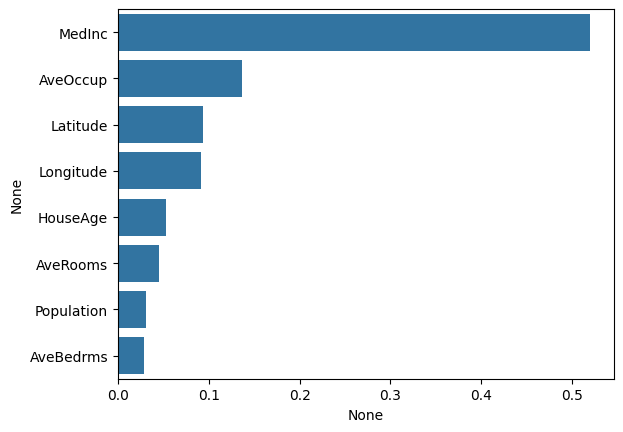

In [ ]:
import seaborn as sns
%matplotlib inline

rf_reg = RandomForestRegressor(n_estimators=1000)
 # 앞 예제에서 만들어진 X.data, y_target 데이터 세트를 적용해 학습합니다.
rf_reg.fit(X_data, y_target)

feature_series = pd.Series(data=rf_reg.feature_importances_, index=X_data.columns )
feature_series = feature_series.sort_values(ascending=False)
sns.barplot(x= feature_series, y=feature_series.index)

(100, 2)


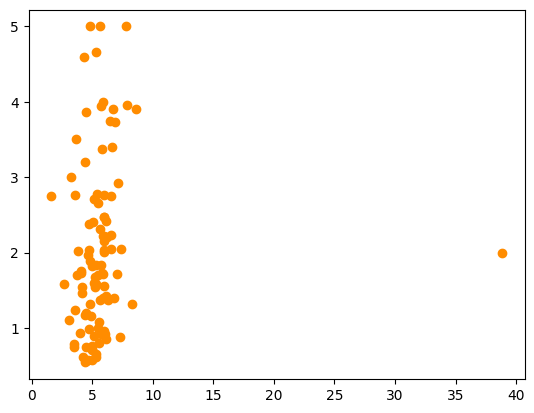

In [ ]:
bostonDF_sample = bostonDF[['AveRooms', 'PRICE']]
bostonDF_sample = bostonDF_sample.sample(n=100, random_state=0)
print(bostonDF_sample.shape)
plt .figure()
plt.scatter(bostonDF_sample.AveRooms, bostonDF_sample.PRICE, c="darkorange")

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
 # 선형 회귀와 결정 트리 기반의 Regressor 생성. DecisionTreeRegressor의 max_depth는 각각 2, 7
lr_reg = LinearRegression ()
rf_reg2 = DecisionTreeRegressor(max_depth=2)
rf_reg7 = DecisionTreeRegressor(max_depth=7)
 # 실제 예측을 적용할 테스트용 데이터 세트를 4.5~8.5까지의 100개 데이터 세트로 생성.
X_test = np.arange(4.5, 8.5, 0.04).reshape(-1, 1)
 # 보스턴 주택 가격 데이터에서 시각화를 위해 피처는(애만, 그리고 결정 데이터인 PRICE 추출
X_feature = bostonDF_sample['AveRooms'].values.reshape(-1,1)
y_target = bostonDF_sample['PRICE'].values.reshape(-1, 1)
 # 학습과 예측 수행.
lr_reg.fit(X_feature, y_target)
rf_reg2.fit(X_feature, y_target)
rf_reg7.fit(X_feature, y_target)

pred_lr = lr_reg.predict(X_test)
pred_rf2 = rf_reg2.predict(X_test)
pred_rf7 = rf_reg7.predict(X_test)

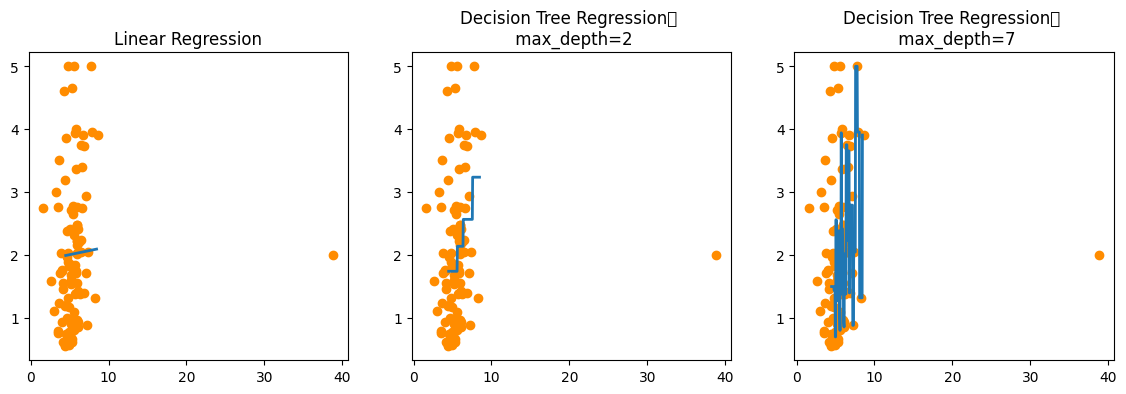

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(figsize=(14, 4), ncols=3)
 # X 축 값을 4.5 ~ 8.5로 변환하며 입력했을 때 선형 회귀와 결정 트리 회귀 예측선 시각화
# 선형 회귀로 학습된 모델 회귀 예측선
ax1.set_title('Linear Regression')
ax1.scatter(bostonDF_sample.AveRooms, bostonDF_sample.PRICE, c="darkorange")
ax1.plot(X_test, pred_lr, label="linear", linewidth=2 )

 # DecisionTreeRegressor의 max_depth를 2로 했을 때 회귀 예측선
ax2.set_title('Decision Tree Regression： \n max_depth=2')
ax2.scatter(bostonDF_sample.AveRooms, bostonDF_sample.PRICE, c="darkorange")
ax2.plot(X_test, pred_rf2, label="max_depth：3", linewidth=2 )

 # DecisionTreeRegressor의 max_depth를 7로 했을 때 회귀 예측선
ax3.set_title('Decision Tree Regression： \n max_depth=7')
ax3.scatter(bostonDF_sample.AveRooms, bostonDF_sample.PRICE, c="darkorange")
ax3.plot(X_test, pred_rf7, label="max_depth：7", linewidth=2)